The goal of this project was to predict the amount a particular customer can purchase a Car , given information like the customer's Age , Gender , Annual Salary ,Net worth and Credit card debt,
I performed exploratory data analysis on the dataset firstly and from the analysis I gained the following insights.
-There is a balance between the number of males and number of females in the dataset , no bias in gender.(0=male , 1=female)
-There is a linear relationship between the car purchase amount and the annual salary , both features are highly positively 
correlated , Customers with higher salary are likely to spend more when purchasing a car.

I also checked the correlation between the target variable(car purchase amount) and other features by plotting a heatmap.

I made use of a simple linear Regression model because of the strong linear relationship between the target variable and the independent features,


Source of dataset : Kaggle

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:\\Users\\user\\Documents\\datasets\\Car_Purchasing_Data.csv')

In [3]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
data.tail()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,USA,1,47,61370.67766,9391.341628,462946.4924,45107.22566


In [5]:
data.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [6]:
data['Country'].unique()

array(['USA'], dtype=object)

<AxesSubplot:xlabel='Gender', ylabel='count'>

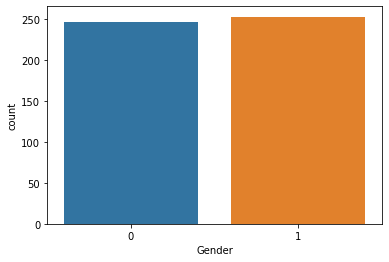

In [7]:
sns.countplot(data = data , x='Gender')

<AxesSubplot:xlabel='Gender', ylabel='Car Purchase Amount'>

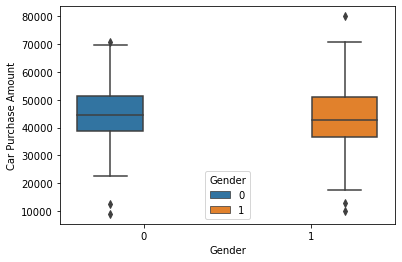

In [8]:
sns.boxplot(data = data , x='Gender', y='Car Purchase Amount', hue='Gender')

In [9]:
data.corr()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000000,-0.066488,-0.036499,0.024193,-0.008395,-0.066408
Age,-0.066488,1.000000,0.000361,0.031748,0.021794,0.633273
Annual Salary,-0.036499,0.000361,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,0.024193,0.031748,0.049599,1.000000,-0.049378,0.028882
Net Worth,-0.008395,0.021794,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,-0.066408,0.633273,0.617862,0.028882,0.488580,1.000000


<AxesSubplot:xlabel='Annual Salary', ylabel='Car Purchase Amount'>

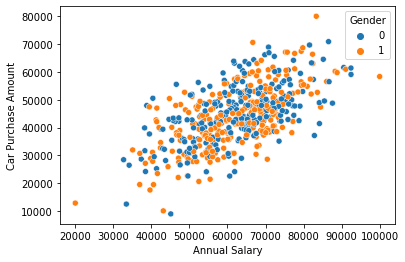

In [10]:
sns.scatterplot(data = data , x ='Annual Salary', y = 'Car Purchase Amount', hue = 'Gender')

<AxesSubplot:>

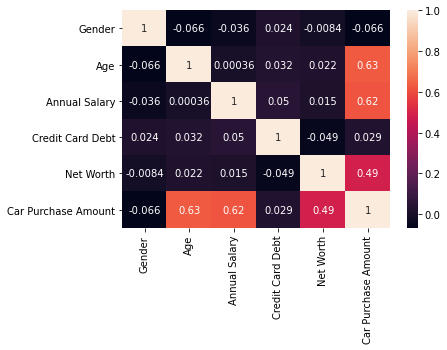

In [11]:
sns.heatmap(data = data.corr(),annot=True)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [13]:
X = data.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis=1).values

In [14]:
Y = data['Car Purchase Amount'].values

In [15]:
X

array([[0.00000000e+00, 4.20000000e+01, 6.28120930e+04, 1.16093809e+04,
        2.38961250e+05],
       [0.00000000e+00, 4.10000000e+01, 6.66468929e+04, 9.57295714e+03,
        5.30973908e+05],
       [1.00000000e+00, 4.30000000e+01, 5.37985511e+04, 1.11603551e+04,
        6.38467177e+05],
       ...,
       [1.00000000e+00, 5.40000000e+01, 6.88887780e+04, 1.06116069e+04,
        7.64531320e+05],
       [1.00000000e+00, 5.90000000e+01, 4.98119906e+04, 1.40130345e+04,
        3.37826638e+05],
       [1.00000000e+00, 4.70000000e+01, 6.13706777e+04, 9.39134163e+03,
        4.62946492e+05]])

In [16]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train, Y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
y_pred

array([29783.30860762, 41774.2691968 , 45667.80127802, 46521.75517394,
       46048.06582065, 42616.43515243, 37617.97598613, 39308.57159771,
       25070.75235282, 31562.74987474, 40521.23487541, 42948.34427739,
       58749.2793685 , 43612.97460141, 60933.86533298, 39982.83291423,
       38107.75010285, 47299.23775892, 37544.42556168, 30750.28401564,
       52912.01811278, 65905.74633406, 53192.78638224, 39450.39025719,
       39980.8484678 , 59602.22785421, 44396.01134237, 56417.36174642,
       51154.23406772, 37288.43878663, 63616.49070338, 45941.18739786,
       46004.05083065, 53237.29725122, 35702.81929752, 45921.93820694,
       49296.92506567, 57440.10355483, 39108.81622653, 32084.56313299,
       35326.19354083, 50024.10057153, 48089.31065039, 47911.11463061,
       52459.17146279, 30193.89402736, 41512.21374183, 38918.75418843,
       45431.70379327, 41535.15747368, 60823.31686065, 31151.90291684,
       36591.43489306, 60019.30688595, 46834.43968542, 31367.02937446,
      

In [21]:
Y_test

array([29754.66271, 41451.71843, 45805.30588, 46892.26617, 45824.5656 ,
       42705.11311, 37259.84386, 39433.40631, 25252.93221, 31978.9799 ,
       40102.11417, 42747.53925, 58840.53964, 43724.4896 , 60526.97788,
       40093.61981, 38182.30465, 47434.98265, 37744.54285, 30667.60927,
       52654.40455, 66158.69494, 53496.48183, 39766.64804, 39606.24598,
       59538.40327, 44650.36073, 56579.90338, 51046.42226, 37376.63439,
       63248.76188, 45593.6849 , 46082.80993, 53655.53859, 35475.00344,
       45509.69732, 49220.0218 , 57461.51158, 39135.03023, 32061.6467 ,
       35716.31133, 49991.60697, 48383.69071, 47693.23482, 52150.41786,
       30240.60975, 41679.7929 , 38674.66038, 45805.67186, 41769.38288,
       61118.46947, 31408.62631, 36367.18452, 59758.73247, 46846.7305 ,
       31526.04931, 48516.84335, 63140.05082, 42213.69644, 28733.68779,
       37161.55393, 47970.76767, 26599.90843, 26499.31418, 38901.60925,
       52785.16947, 56611.99784, 49079.61942, 28925.70549, 45442

In [22]:
model.score(X_train, Y_train)

0.9994972718431099

In [23]:
from sklearn.metrics import r2_score

In [24]:
score= r2_score(Y_test , y_pred)

In [25]:
score

0.9995136102176418

Text(0, 0.5, 'Y predicted')

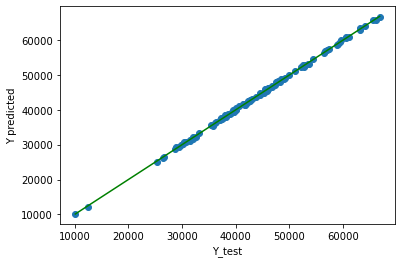

In [34]:
plt.scatter(Y_test, y_pred)
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], '-', c= 'green')
plt.xlabel('Y_test')
plt.ylabel('Y predicted')